<a href="https://colab.research.google.com/github/pujaroy280/Data-Analytics-Microcredential/blob/main/(PR)Data_Analytics_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Every notebook from now on follows this template


# Task 1: Identify the Problem

 Create an Analysis of this housing data to predict the price using 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',  'sqft_above', 'sqft_basement'


# Task 2: Load the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Task 3: Load the Data

In [ ]:
!wget https://raw.githubusercontent.com/msiddalingaiah/MachineLearning/master/Regression/data/kc_house_data.csv -O kc_house_data.csv

--2022-07-20 00:25:52--  https://raw.githubusercontent.com/msiddalingaiah/MachineLearning/master/Regression/data/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [text/plain]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>]   2.40M  --.-KB/s    in 0.04s   

2022-07-20 00:25:52 (59.1 MB/s) - ‘kc_house_data.csv’ saved [2515206/2515206]



# Task 4: EDA (Exploratory Data Analysis)

In [ ]:
data = pd.read_csv("kc_house_data.csv")

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
# ;price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement'
'''
space = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']]
price = data['price']
'''

basement = data['sqft_basement']
above = data['sqft_above']
bathroom = data['bathrooms']
bedroom = data['bedrooms']
living = data['sqft_living']
lot = data['sqft_lot']
price = data['price']
# creating new variables, not columns

In [ ]:
# Change X's into 2D array
X_basement = np.array(basement).reshape(-1,1)
X_above = np.array(above).reshape(-1,1)
X_bathroom = np.array(bathroom).reshape(-1,1)
X_bedroom = np.array(bedroom).reshape(-1,1)
X_living = np.array(living).reshape(-1,1)
X_lot = np.array(lot).reshape(-1,1)
Y = np.array(price)

In [ ]:
X_basement

array([[  0],
       [400],
       [  0],
       ...,
       [  0],
       [  0],
       [  0]])

In [ ]:
X_above

array([[1180],
       [2170],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [ ]:
X_bathroom

array([[1.  ],
       [2.25],
       [1.  ],
       ...,
       [0.75],
       [2.5 ],
       [0.75]])

In [ ]:
X_bedroom

array([[3],
       [3],
       [2],
       ...,
       [2],
       [3],
       [2]])

In [ ]:
X_living

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [ ]:
X_lot

array([[ 5650],
       [ 7242],
       [10000],
       ...,
       [ 1350],
       [ 2388],
       [ 1076]])

In [ ]:
Y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

## Create the Data Split

In [ ]:
X_base_train, X_base_test, Y_train, Y_test = train_test_split(X_basement,Y, test_size=0.3, random_state=0)
X_above_train, X_above_test, Y_train, Y_test = train_test_split(X_above,Y, test_size=0.3, random_state=0)
X_bathroom_train, X_bathroom_test, Y_train, Y_test = train_test_split(X_bathroom,Y, test_size=0.3, random_state=0)
X_bedroom_train, X_bedroom_test, Y_train, Y_test = train_test_split(X_bedroom,Y, test_size=0.3, random_state=0)
X_living_train, X_living_test, Y_train, Y_test = train_test_split(X_living,Y, test_size=0.3, random_state=0)
X_lot_train, X_lot_test, Y_train, Y_test = train_test_split(X_lot,Y, test_size=0.3, random_state=0)

# Task 5: Data Visualization

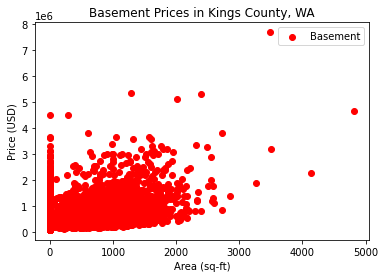

In [ ]:
# Visualize training set for basements
plt.scatter(X_base_train,Y_train, color='red',label='Basement')
plt.title("Basement Prices in Kings County, WA")
plt.xlabel("Area (sq-ft)")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

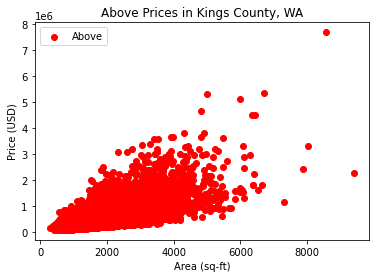

In [ ]:
# Visualize training set for above floor
plt.scatter(X_above_train,Y_train, color='red',label='Above')
plt.title("Above Prices in Kings County, WA")
plt.xlabel("Area (sq-ft)")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

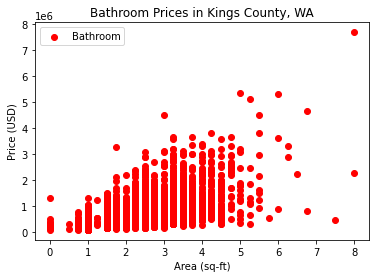

In [ ]:
# Visualize training set for bathrooms
plt.scatter(X_bathroom_train,Y_train, color='red',label='Bathroom')
plt.title("Bathroom Prices in Kings County, WA")
plt.xlabel("Area (sq-ft)")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

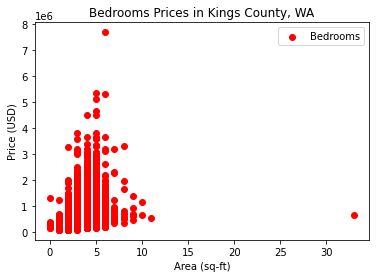

In [ ]:
# Visualize training set for bedrooms
plt.scatter(X_bedroom_train,Y_train, color='red',label='Bedrooms')
plt.title("Bedrooms Prices in Kings County, WA")
plt.xlabel("Area (sq-ft)")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

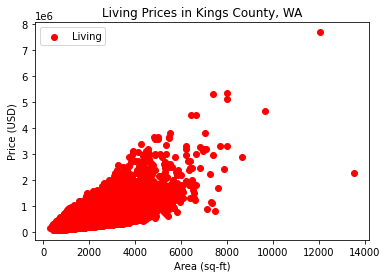

In [ ]:
# Visualize training set for living rooms
plt.scatter(X_living_train,Y_train, color='red',label='Living')
plt.title("Living Prices in Kings County, WA")
plt.xlabel("Area (sq-ft)")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

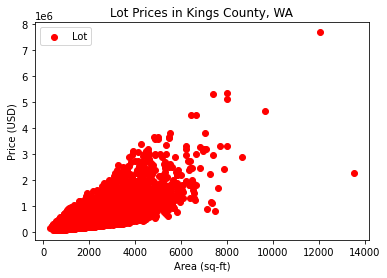

In [ ]:
# Visualize training set for lots
plt.scatter(X_living_train,Y_train, color='red',label='Lot')
plt.title("Lot Prices in Kings County, WA")
plt.xlabel("Area (sq-ft)")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# Task 6: Compute the Cost Function

In [ ]:
# At this time, no Cost Function needed!

# Task 7: Compute the Gradient Descent

In [ ]:
# At this time, no Gradient Descent needed!

# Task 8: Visualize the Cost Function

In [ ]:
# At this time, not needed!

# Task 9: Conduct The Linear Regression on the Data

In [ ]:
regressor_base = LinearRegression()
regressor_above = LinearRegression()
regressor_bath = LinearRegression()
regressor_bed = LinearRegression()
regressor_liv = LinearRegression()
regressor_lot = LinearRegression()

In [ ]:
regressor_base.fit(X_base_train,Y_train)
regressor_above.fit(X_above_train,Y_train)
regressor_bath.fit(X_bathroom_train,Y_train)
regressor_bed.fit(X_bedroom_train,Y_train)
regressor_liv.fit(X_living_train,Y_train)
regressor_lot.fit(X_lot_train,Y_train)

LinearRegression()

# Task 10: Making Predictions

In [ ]:
y_pred = regressor.predict(X_test)

regressor_base.fit(X_base_train,Y_train)
regressor_above.fit(X_above_train,Y_train)
regressor_bath.fit(X_bathroom_train,Y_train)
regressor_bed.fit(X_bedroom_train,Y_train)
regressor_liv.fit(X_living_train,Y_train)
regressor_lot.fit(X_lot_train,Y_train)